# Pandas 3
### Nathaniel Neubert
### 10/5/2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [73]:
def prob1():
    """
    Use groupby objects to determine information about private
    and public universities.
    Specifically examine the columns 'S.F.Ratio', 'Top10perc',
    and 'Top25perc'.
    For each column return the values of the describe function
    for the type of university with the higher mean.
    
    Return:
        ans_1 (ndarray): describe array of universities with 
                         higher S.F.Ratio
        ans_2 (ndarray): describe array of universities with
                         more students from Top10perc
        ans_3 (ndarray): describe array of universities with
                         more students from Top25perc
    """
    df = pd.read_csv("college.csv")
    priblic = df.groupby("Private") #
    means = priblic.mean()
    
    #Top 10 percent search for best
    per10 = priblic["Top10perc"].describe()
    #print(per10)
    high10 = per10["mean"].idxmax()
    top10 = per10.loc[high10].values
    
    #Top 25 percent search for best
    per25 = priblic["Top25perc"].describe()
    #print(per25)
    high25 = per25["mean"].idxmax()
    top25 = per25.loc[high25].values
    
    #FR search for best
    FR = priblic["S.F.Ratio"].describe()
    #print(per25)
    meanFR = FR["mean"].idxmax()
    topFR = FR.loc[meanFR].values
    
    return (topFR, top10, top25)
    #top10 = means["Top10perc"].values
    #top25 = means["Top25perc"].values
    #SFrat = means["S.F.Ratio"].values
    #return SFrat, top10, top25

In [74]:
prob1()

(array([565.        ,  29.33097345,  17.85139147,   1.        ,
         17.        ,  25.        ,  36.        ,  96.        ]),
 array([565.        ,  56.95752212,  19.58836048,   9.        ,
         42.        ,  55.        ,  70.        , 100.        ]),
 array([212.        ,  17.13915094,   3.41804873,   6.7       ,
         15.1       ,  17.25      ,  19.325     ,  28.8       ]))

# Problem 2

In [113]:
def prob2():
    """
    Use groupby visualizations to compare the following
    in private and public universities:
        1. Number of applicants, accept applicants, and
           enrolled applicants
        2. Range of price for room and board
    """
    df = pd.read_csv("college.csv")
    priblic = df.groupby("Private")
    
    #priblic.get_group("Yes").plot(kind="hist", y="Apps", legend="false", title="Private Applications")
    #Transpose the data for an easy bar chart
    Triblic = priblic[["Apps","Accept","Enroll"]].mean().T
    Triblic.plot(kind="barh", title="Applicants, Accepted and Enrolled Private and Public")
    
    #Create a boxplot for the Room and Board
    df.boxplot(["Room.Board","Books"], by="Private", grid=False)
    plt.tight_layout()
    plt.show()

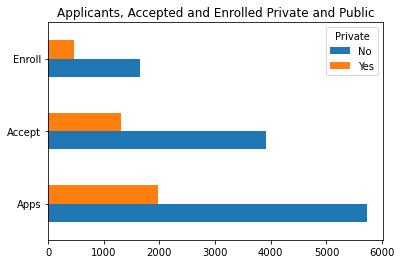

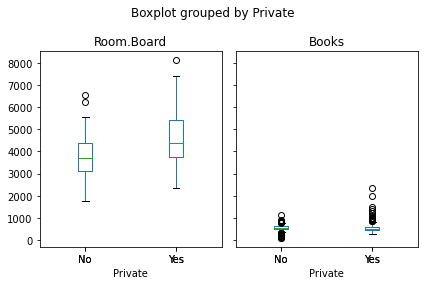

In [114]:
prob2()

The number of applicants to private Universities is far lower than to public universities and they also enroll far fewer students. The actual proportion of accepted students to applications doesn't seem too different.

Books at private Universities appear to be about the same cost as public ones with some exceptions. I would pin the private expensive outliers on professors selling their own books at double cost, a practice gratefully not done at BYU. While Private Universities may cost more for room and board generally, it isn't too far off from public universities.

# Problem 3

In [6]:
def prob3():
    """
    Use Ohio_1999.csv and pivot tables to answer the
    following questions
        1. Which race/sex combination makes the most money in aggregate?
        2. Which race/sex combination worked the least amount of 
            cumulative hours?
        3. What race/sex combination worked the most hours per week per person?
    
    Returns:
        ans_1 (tuple): tuple with race and sex code, respectively
        ans_2 (tuple): tuple with race and sex code, respectively
        ans_3 (tuple): tuple with race and sex code, respectively
    """
    #
    df = pd.read_csv("Ohio_1999.csv")
    
    #"" AGGREGATE "" the data
    agdf = df.groupby(["Race","Sex"]).sum()
    gbdf = df.groupby(["Race","Sex"]).mean()
    
    #Return the desired ids for the maximums
    return agdf["Usual Weekly Earnings"].idxmax(), agdf["Usual Hours Worked"].idxmin(), gbdf["Usual Hours Worked"].idxmax()

In [7]:
prob3()

((1, 1), (3, 2), (3, 1))

# Problem 4

In [18]:
def prob4():
    """
    Use Ohio_1999.csv to answer the following questions:
        1. What is the most common degree among workers?
        2. Which interval has the most workers?
        3. What age/degree combination has the smallest yearly
           salary on average?
    
    Return:
        ans_1 (Interval): degree interval
        ans_2 (Interval): age interval
        ans_3 (Interval, Interval): age interval and degree interval
    """
    df = pd.read_csv("Ohio_1999.csv")
    edcut = pd.cut(df['Educational Attainment'], [0,38,42,47]) #less than 39 no degree, 39-42 high school or associates, 43 or above bachelor's
    q1 = df.pivot_table(values="Educational Attainment", index = edcut, aggfunc="count")
    ans_1 = q1.idxmax()["Educational Attainment"] #Return most common degree type
    
    agcut = pd.cut(df['Age'], 4) #Divide by age groups
    q2 = df.pivot_table(values="Age", index =agcut, aggfunc="count")
    ans_2 = q2.idxmax()["Age"] #Return most common age range
    
    q3 = df.pivot_table(values="Yearly Salary", index=[agcut, edcut], aggfunc="mean")
    ans_3 = q3.idxmin()["Yearly Salary"]
    
    return ans_1, ans_2, ans_3

In [19]:
prob4()

(Interval(38, 42, closed='right'),
 Interval(33.25, 50.5, closed='right'),
 (Interval(67.75, 85.0, closed='right'), Interval(38, 42, closed='right')))

# Problem 5

In [202]:
def prob5():
    """
    Use College.csv to answer the following questions:
        1. Is there a correlation between the percent of alumni
           that donate and the amount the school spends per
           student in both private and public universities?
        2. Is the graduation rate partition with the greatest
           number of schools the same for private and public
           universities?
        3. Is there an inverse correlation between acceptance
           rate and having students from the top 10% of their
           high school class?
        4. Why is the average percentage of students admitted
           from the top 10 percent of their high school class
           so high in private universities with very low
           acceptance rates?
    
    Returns:
        ans_1 (bool): answer to question 1
        ans_2 (bool): answer to question 2
        ans_3 (bool): answer to question 3
        ans_4 (str): answer to question 4
    """
    df = pd.read_csv("College.csv") #Divide based on perc.alumni and privitization.
    priblic = pd.qcut(df["perc.alumni"], 6)
    q1 = df.pivot_table(values="Expend", index=["Private", priblic], aggfunc="mean", fill_value='-')
    
    print(q1) #This print statement reveals that there is a strong correlaiton between alumni donations
    #and the Expend.
    ans_1 = True
    
    GradCut = pd.qcut(df["Grad.Rate"],6)
    q2 = df.pivot_table(values="Grad.Rate", index=["Private", GradCut], aggfunc="count")
    #The following statement is similar to q1 above but for q2
    print(q2)
    ans_2 = False
    
    df["AcRate"]=df["Accept"]/df["Apps"]
    AcceptRate = pd.cut(df["AcRate"],[0,.10,.20,.30,.40,.50,.60,.70,.80,.90,1])
    q3 = df.pivot_table(values="Top10perc", index=["Private", AcceptRate], aggfunc="mean")
    #The following statement is similar to those above but for q3
    print(q3)
    ans_3 = True
    
    return ans_1, ans_2, ans_3, "Private universities with very low acceptance rates have a large number of applicants and but only accept a few mostly those from the top 10 percent"
    

In [203]:
prob5()

                              Expend
Private perc.alumni                 
No      (-0.001, 10.0]   7230.121622
        (10.0, 16.0]     7446.695652
        (16.0, 21.0]     7473.000000
        (21.0, 27.0]     8049.913043
        (27.0, 35.0]     7056.363636
        (35.0, 64.0]    11467.500000
Yes     (-0.001, 10.0]   8214.434783
        (10.0, 16.0]     8747.270270
        (16.0, 21.0]     9255.036585
        (21.0, 27.0]     9569.473684
        (27.0, 35.0]    10565.926829
        (35.0, 64.0]    14287.491803
                       Grad.Rate
Private Grad.Rate               
No      (9.999, 49.0]         70
        (49.0, 58.0]          58
        (58.0, 65.0]          34
        (65.0, 73.0]          25
        (73.0, 83.0]          16
        (83.0, 118.0]          9
Yes     (9.999, 49.0]         67
        (49.0, 58.0]          79
        (58.0, 65.0]          83
        (65.0, 73.0]         110
        (73.0, 83.0]         117
        (83.0, 118.0]        109
                    

(True,
 False,
 True,
 'Private universities with very low acceptance rates have a large number of applicants and but only accept a few mostly those from the top 10 percent')